<a href="https://colab.research.google.com/github/Hasinbalwa/Natural-Gas-forecasting/blob/main/Natural_Gas_Price_Forecast_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
# load the Nat_Gas.cs file in input_file
input_file = "/content/Nat_Gas.csv"

# Load the dataset
df=pd.read_csv(input_file,parse_dates=["Dates"])
df.set_index("Dates",inplace=True)

print(df.head())

print(df.isnull().sum())





            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9
Prices    0
dtype: int64


<ipython-input-4-6d5301f1d8fe>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv(input_file,parse_dates=["Dates"])


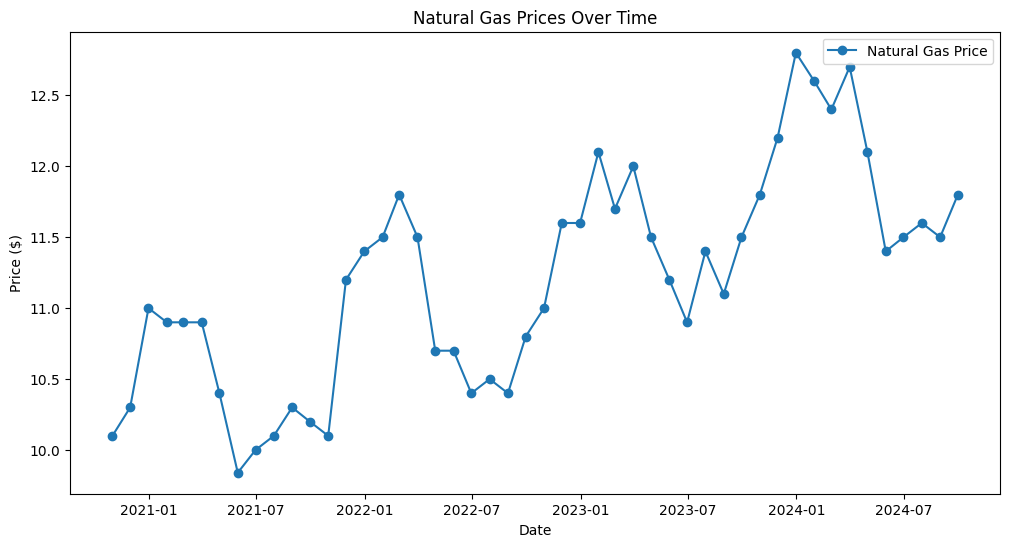

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df["Prices"],marker="o",linestyle="-",label="Natural Gas Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Natural Gas Prices Over Time")
plt.legend()
plt.show()

Estimated price on 2023-06-15 00:00:00: $11.05


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

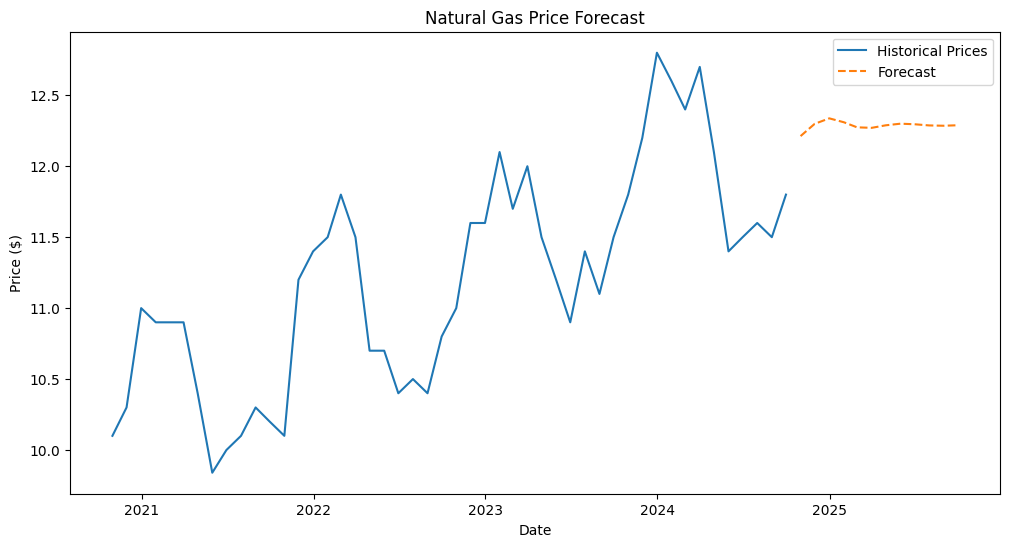

Estimated price on 2025-05-15 00:00:00: $12.299845387943424


In [ ]:
input_date= "2023-06-15"
input_date= pd.to_datetime(input_date)

if input_date in df.index:
    estimated_price= df.loc[input_date, "prices"]

else:
    estimated_price= np.interp(input_date.timestamp(),df.index.astype(int)/10**9,df["Prices"])

print(f"Estimated price on {input_date}: ${estimated_price:.2f}")

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

model = ARIMA(train["Prices"], order=(2,1,2))
model_fit = model.fit()

future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')  # Create future dates
forecast = model_fit.forecast(steps=12)

# Store predictions in a DataFrame
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted Prices": forecast})
forecast_df.set_index("Date", inplace=True)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Prices"], label="Historical Prices")
plt.plot(forecast_df.index, forecast_df["Forecasted Prices"], linestyle="dashed", label="Forecast")  # Forecasted prices
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Natural Gas Price Forecast")
plt.legend()
plt.show()


query_date = "2025-05-15"
query_date = pd.to_datetime(query_date)

if query_date in df.index:
    estimated_price = df.loc[query_date, "Prices"]

elif query_date > df.index[-1]:
    future_steps = (query_date.year - df.index[-1].year) * 12 + (query_date.month - df.index[-1].month)  # Number of months ahead
    if future_steps <= 12:
        estimated_price = forecast_df.iloc[future_steps - 1]["Forecasted Prices"]
    else:
        estimated_price = "Prediction beyond available data range"

else:
    estimated_price = np.interp(query_date.timestamp(), df.index.astype(int) / 10**9, df["Prices"])

print(f"Estimated price on {query_date}: ${estimated_price}")



